<h2>Digit Recognition using CNN with Optimized Model's Performance using Batch Normalization and Dropout Layer</h2>

<h3>Importing Libraries</h3>

In [492]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Conv2D
from keras.layers import BatchNormalization, LeakyReLU, Dropout
from keras.optimizers import Adam

import pickle
import cv2

<h3>Data Extraction</h3>

Extracted from kaggle but is a MNIST Handwritten Digits Datasets.

In [493]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [494]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [495]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The train dataset consists of 784 columns for pixel values and additional one column named "label" as target variable that represent numbers from 0 to 9.

<h3>Exploratory Data Analysis</h3>

In [496]:
train.shape, test.shape

((42000, 785), (28000, 784))

Total of 42k records for training and 28K for testing with 785 columns in prior and 784 columns in later.

In [497]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


Each attribute in dataset is of integer type.

In [498]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [499]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [500]:
train['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

The total number of unique labels in the datasets is nine. i.e. digits from 0 to 9

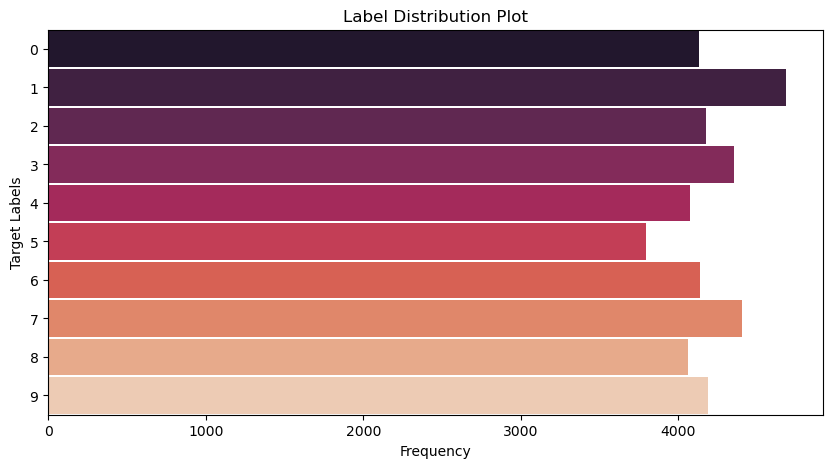

In [501]:
label_counter = train['label'].value_counts()

fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x=label_counter.values, y=label_counter.index, orient="h", palette="rocket", ax=ax, width=0.95)
ax.set_xlabel("Frequency")
ax.set_ylabel("Target Labels")
ax.set_title("Label Distribution Plot")
plt.show()

From distribution plot, the count of class label 1 is highest and class label 5 is lowest. However, each class count is nearly equal which shows the dataset is balanced.

Displaying each digit with the mean value from whole observations.

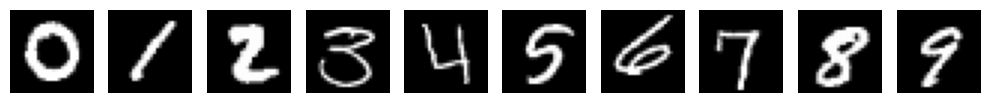

In [502]:
# displaying any randomly selected record for each labeled digit
num_df = train.groupby(['label']).first().reset_index()

fig, axes = plt.subplots(1, 10, figsize=(10, 10))
for index, row in num_df.drop(['label'], axis=1).iterrows():
    image_shaped = row.to_numpy().reshape(28, 28)
    ax = axes[index]
    ax.imshow(image_shaped, cmap="gray")
    ax.axis("off")

plt.tight_layout()
plt.show()

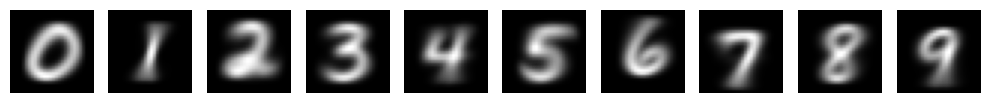

In [503]:
# displaying average pixel combination for each digit
grouped_train = train.groupby(['label']).mean().reset_index()

fig, axes = plt.subplots(1, 10, figsize=(10, 10))
for index, row in grouped_train.drop(['label'], axis=1).iterrows():
    image_shaped = row.to_numpy().reshape(28, 28)
    ax = axes[index]
    ax.imshow(image_shaped, cmap="gray")
    ax.axis("off")

plt.tight_layout()
plt.show()

Visualizing pixel representation of number 0 by grouping labels and agreggating with mean.

<Axes: title={'center': 'Pixel Representation of Number 0 using Heatmap'}>

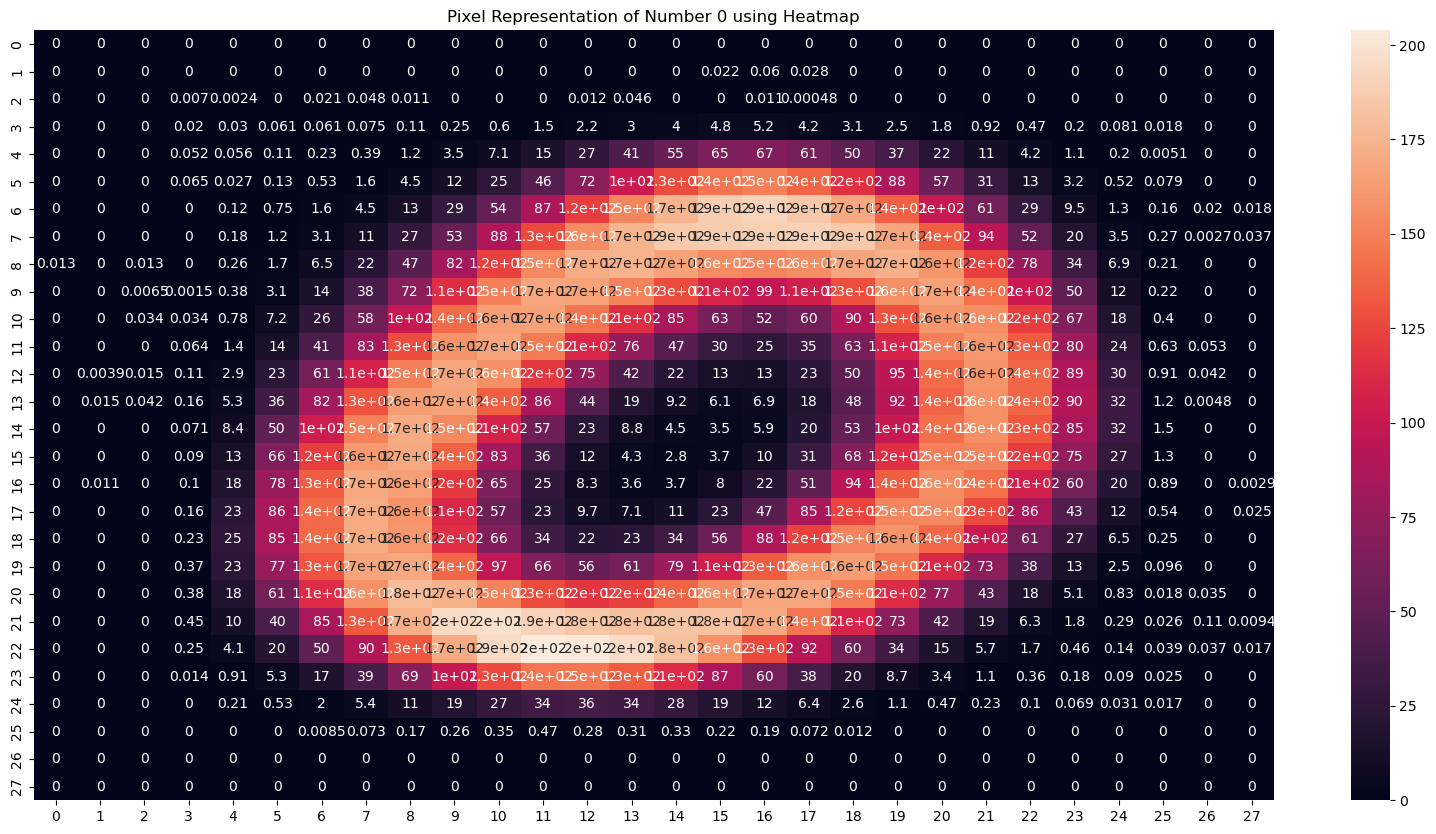

In [504]:
num0 = grouped_train.drop(['label'], axis=1).iloc[0].to_numpy().reshape(28, 28)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Pixel Representation of Number 0 using Heatmap")
sns.heatmap(data=num0, annot=True, ax=ax)


Visualization how pixel value of each digit are correlated.

<Axes: title={'center': 'Correlation between Average Pixel Values of Digits 0-9'}>

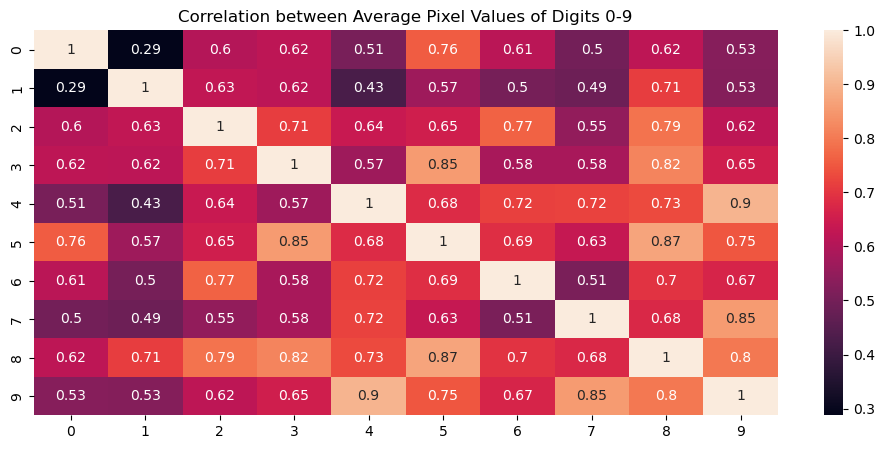

In [505]:
data_corr = grouped_train.drop(['label'], axis=1).T.corr()

fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title("Correlation between Average Pixel Values of Digits 0-9")
sns.heatmap(data=data_corr, annot=True)

The correlation graph shows that the numbers which have similar pixel representation are highly  correlated such as 8 and 9 and dissimilar numbers like 1 and 9 are less correlated.

<h3>Data Preprocessing</h3>

<h4>1. Data Validation and Cleansing</h4>

In [506]:
train.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

There is no any null records in the datasets as expected because the pixel value representing image can never be null.

In [507]:
train.duplicated().sum()

0

Neither the duplicate records exist in the datset. There is no duplicates as expected because each observation has 784 values whose combination is less probable to be similar.

<h4>Normalization of Pixel Values</h4>

In [ ]:
X_train = train.drop(['label'], axis=1)
y_train = train['label']

In [ ]:
X_train = X_train / 255
test = test / 255

Dividing train and test data with 255 (max_value) to normalize the values between 0 and 1

<h4>3. Reshapping and One-Hot Encoding</h4>

In [510]:
X_train = X_train.to_numpy('float32').reshape(42000,28,28)
y_train = to_categorical(y_train, 10)

X_train.shape, y_train.shape

((42000, 28, 28), (42000, 10))

The 784 pixel valued columns are reshaped into 28X28 i.e. height and width of image. Also, the categorical target labels are one-hot encoded because neural network expect the output in same way for catgeorical values.

In [511]:
X_test = test.to_numpy('float32').reshape(28000,28,28)

X_test.shape

(28000, 28, 28)

<h3>Model Development, Training, Testing and Visualization</h3>

<h4>1. Using Multi-Layers Neural Network Model</h4>

<h5>A. Model Development</h5>

In [512]:
# Model1
input_layer = Input(shape=(28,28,1))
flatten_layer = Flatten() (input_layer)
dlayer2 = Dense(units=128, activation='relu') (flatten_layer)
dlayer3 = Dense(units=100, activation='relu') (dlayer2)
output_layer = Dense(units=10, activation="softmax") (dlayer3)

# Create an instance of the model
model1 = Model(inputs=input_layer, outputs=output_layer)

model1.summary()

Model: "model_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_44 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 flatten_43 (Flatten)        (None, 784)               0         
                                                                 
 dense_109 (Dense)           (None, 128)               100480    
                                                                 
 dense_110 (Dense)           (None, 100)               12900     
                                                                 
 dense_111 (Dense)           (None, 10)                1010      
                                                                 
Total params: 114390 (446.84 KB)
Trainable params: 114390 (446.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Firstly, model1 has one input layer with shape (28, 28, 1) which represent height, width and color channel of input image. Then, multi-dimensional layer is converted to 1-D layer through flatten layer and additional two fully connected dense layers are added. Finally, the output dense layer is integrated that has 10 output neurons that represent the 10 class labels in our dataset. 

<h5>B. Assigning Loss Function and Optimizer</h5>

In [513]:
opt = Adam(learning_rate=0.006)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

After developing model, the model is compiled with loss function as "categorical_crossentropy", optimizer function as "Adam", and metrics as "accuracy".

<h5>C. Model Training</h5>

In [514]:
history1 = model1.fit(X_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_split=0.1) 

# fitting model with batch size of 32 and 10 spochs.
# bacth size = 32 means the model is fed with 32  observations and shuffle=True means the batch datasets is chosen randomly
# epochs = 10 means training loop is iterated 10 times to improve model

Epoch 1/10
1182/1182 [==============================] - 6s 4ms/step - loss: 1.6238 - accuracy: 0.8454 - val_loss: 0.3353 - val_accuracy: 0.9140
Epoch 2/10
1182/1182 [==============================] - 4s 4ms/step - loss: 0.3369 - accuracy: 0.9110 - val_loss: 0.4266 - val_accuracy: 0.9107
Epoch 3/10
1182/1182 [==============================] - 4s 4ms/step - loss: 0.3690 - accuracy: 0.9093 - val_loss: 0.4041 - val_accuracy: 0.8957
Epoch 4/10
1182/1182 [==============================] - 4s 4ms/step - loss: 0.4688 - accuracy: 0.8908 - val_loss: 0.6183 - val_accuracy: 0.8329
Epoch 5/10
1182/1182 [==============================] - 4s 3ms/step - loss: 0.5565 - accuracy: 0.8662 - val_loss: 0.5736 - val_accuracy: 0.8748
Epoch 6/10
1182/1182 [==============================] - 4s 4ms/step - loss: 0.5552 - accuracy: 0.8735 - val_loss: 0.5501 - val_accuracy: 0.8924
Epoch 7/10
1182/1182 [==============================] - 4s 4ms/step - loss: 0.4925 - accuracy: 0.8813 - val_loss: 0.9067 - val_accuracy:

After complete 10 iterations, the model training accuracy is 85% and validation accuracy is 78%. Also, one can see the model convergence is not so good and it's stability is poor as well.

<h5>D. Prediction on Testing Dataset</h5>

In [545]:
num_classes = np.array([0,1,2,3,4,5,6,7,8,9]) # array of label class

y_pred = model1.predict(X_test) # y_pred will be one-hot encoded output
ysingle_pred = num_classes[np.argmax(y_pred, axis=-1)] # converting hot-encoded data into single output

ysingle_pred

875/875 [==============================] - 2s 2ms/step


array([2, 0, 9, ..., 3, 9, 2])

<h5>E. Visualization of Predicted Outcomes</h5>

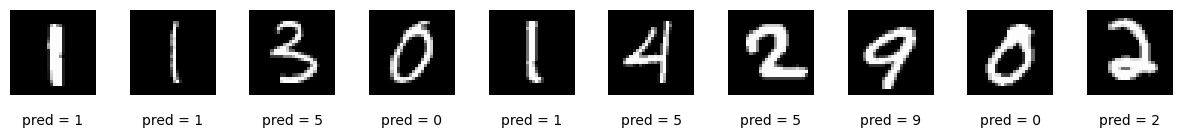

In [547]:
def visualize_prediction(n_to_show = 10, ysingle_pred=ysingle_pred, X_test=X_test):
    # Number of images (number) we want to show at a time. n_to_show = 10

    # Selecting random indices to show the number in that position in X_test
    indices = np.random.choice(range(len(X_test)), n_to_show)

    fig = plt.figure(figsize=(15, 3))
    fig.subplots_adjust(hspace=0.4, wspace=0.4) # adjusting space properly between images

    for i, idx in enumerate(indices):
        label = X_test[idx]
        ax = fig.add_subplot(1, n_to_show, i+1) # positioning subplots
        ax.axis('off') # removing axis
        ax.text(0.5, -0.35, 'pred = ' + str(ysingle_pred[idx]), fontsize=10
                , horizontalalignment='center', transform=ax.transAxes) # horizontalalignment or ha
        ax.imshow(label, cmap="gray") # used to display data as an image; i.e. on a 2D regular raster.

visualize_prediction()


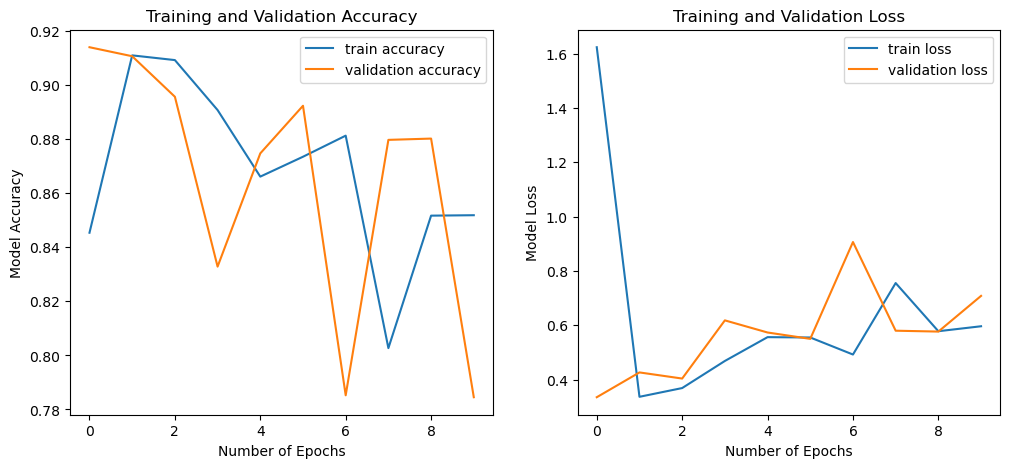

In [517]:
def visualize_model_performance(model_history):
    train_loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']

    train_accuracy = model_history.history['accuracy']
    val_accuracy = model_history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    curves = ['loss', 'accuracy']
    for curve in curves:
        if curve == "loss":
            ax = axes[1]
            sns.lineplot(data=train_loss,ax=ax, label="train loss")
            sns.lineplot(data=val_loss,ax=ax, label="validation loss")
            ax.set_title("Training and Validation Loss")
            ax.set_xlabel("Number of Epochs")
            ax.set_ylabel("Model Loss")
            ax.legend()
        if curve == "accuracy":
            ax = axes[0]
            sns.lineplot(data=train_accuracy, ax=ax, label="train accuracy")
            sns.lineplot(data=val_accuracy, ax=ax, label="validation accuracy")
            ax.set_title("Training and Validation Accuracy")
            ax.set_xlabel("Number of Epochs")
            ax.set_ylabel("Model Accuracy")
            ax.legend()

visualize_model_performance(history1)

32/32 [==============================] - 0s 2ms/step


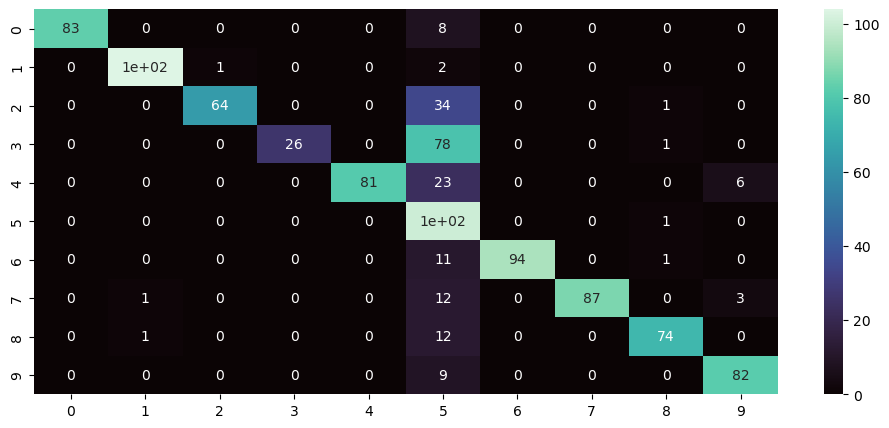

In [518]:
def visualize_confusion_matrix(model):
    selected_indices = np.random.choice(np.arange(0, X_test.shape[0]), size=1000, replace=False)
    X_true = X_train[selected_indices]
    y_true = np.argmax(y_train[selected_indices], axis=1)

    y_predicted = np.argmax(model.predict(X_true), axis=1)

    cm = confusion_matrix(y_true, y_predicted)

    fig, ax = plt.subplots(figsize=(12, 5))
    sns.heatmap(data=cm, annot=True, cmap="mako", ax=ax)
    plt.show()

visualize_confusion_matrix(model1)

From above confusion, the model1 predicted the class label 5 more which is a misclassification leading to lower accuracy.

32/32 [==============================] - 0s 2ms/step


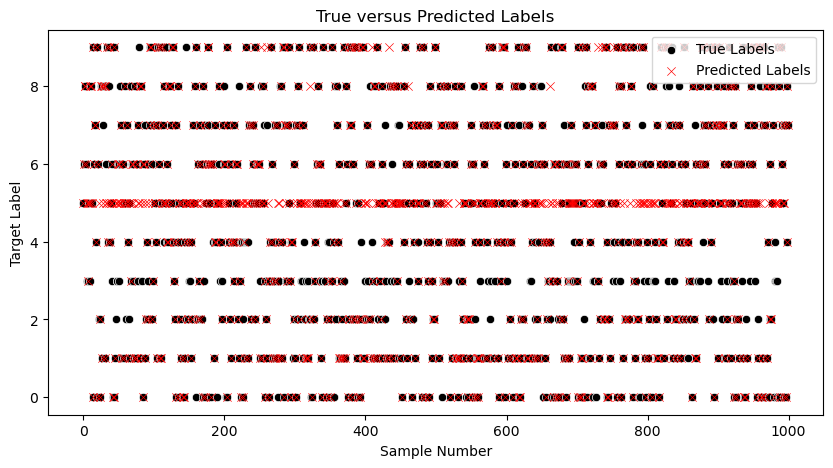

In [519]:
def visualize_train_versus_predicted(model):
    selected_indices = np.random.choice(np.arange(0, X_test.shape[0]), size=1000, replace=False)
    X_true = X_train[selected_indices]
    y_true = np.argmax(y_train[selected_indices], axis=1)

    y_predicted = np.argmax(model.predict(X_true), axis=1)
    
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.scatterplot(x=np.arange(len(y_true)), y=y_true, color='black', label='True Labels', ax=ax)
    sns.scatterplot(x=np.arange(len(y_predicted)), y=y_predicted, color='red', marker="x", label='Predicted Labels', ax=ax)
    ax.set_xlabel("Sample Number")
    ax.set_ylabel("Target Label")
    ax.set_title("True versus Predicted Labels")
    ax.legend(loc="upper right")
    plt.show()

visualize_train_versus_predicted(model1)

<h4>2. Using Convolution Neural Network (CNN) </h4>

<h5>A. Model Development</h5>

In [520]:
input_layer = Input(shape=(28,28,1))
layer1 = Conv2D(filters=12, kernel_size=(4,4), strides=1, padding="same") (input_layer)
layer2 = Conv2D(filters=15, kernel_size=(3,3), strides=2, padding="same") (layer1)
flat_layer = Flatten() (layer2)
output_layer = Dense(units=10, activation="softmax")(flat_layer)

model2 = Model(input_layer, output_layer)
model2.summary()

Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_45 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_52 (Conv2D)          (None, 28, 28, 12)        204       
                                                                 
 conv2d_53 (Conv2D)          (None, 14, 14, 15)        1635      
                                                                 
 flatten_44 (Flatten)        (None, 2940)              0         
                                                                 
 dense_112 (Dense)           (None, 10)                29410     
                                                                 
Total params: 31249 (122.07 KB)
Trainable params: 31249 (122.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


For model2, there is one input layer, two convolutional layers, one flat layer and one output Dense layer. The dimension of input and output layers are same as model1 because we have same input images and output labels.

<h5>B. Assigning Loss Function and Optimizer</h5>

In [521]:
opt = Adam(learning_rate=0.006)
model2.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

<h5>C. Model Training</h5>

In [522]:
history2 = model2.fit(X_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_split=0.1) 

Epoch 1/10
1182/1182 [==============================] - 16s 13ms/step - loss: 2.2308 - accuracy: 0.8199 - val_loss: 0.8021 - val_accuracy: 0.8495
Epoch 2/10
1182/1182 [==============================] - 14s 12ms/step - loss: 19.1827 - accuracy: 0.8236 - val_loss: 1.0135 - val_accuracy: 0.8612
Epoch 3/10
1182/1182 [==============================] - 15s 13ms/step - loss: 0.9425 - accuracy: 0.8595 - val_loss: 1.9316 - val_accuracy: 0.7519
Epoch 4/10
1182/1182 [==============================] - 16s 14ms/step - loss: 11.9680 - accuracy: 0.8477 - val_loss: 178.7915 - val_accuracy: 0.7593
Epoch 5/10
1182/1182 [==============================] - 14s 12ms/step - loss: 8.0316 - accuracy: 0.8596 - val_loss: 0.9700 - val_accuracy: 0.8821
Epoch 6/10
1182/1182 [==============================] - 15s 13ms/step - loss: 1.6127 - accuracy: 0.8643 - val_loss: 5.8958 - val_accuracy: 0.8921
Epoch 7/10
1182/1182 [==============================] - 17s 14ms/step - loss: 4.9000 - accuracy: 0.8590 - val_loss: 1.35

After training model2 completely, the model accuracy is 86.7% for training and validation accuracy is 87.6%. The convergence is not so good while stability was somewhat improved compared to model1.

<h5>D. Prediction on Testing Dataset</h5>

In [523]:
y_pred = model2.predict(X_test)
ysingle_pred = num_classes[np.argmax(y_pred, axis=-1)]

ysingle_pred

875/875 [==============================] - 5s 6ms/step


array([2, 0, 4, ..., 3, 9, 2])

<h5>E. Visualization of Predicted Outcomes</h5>

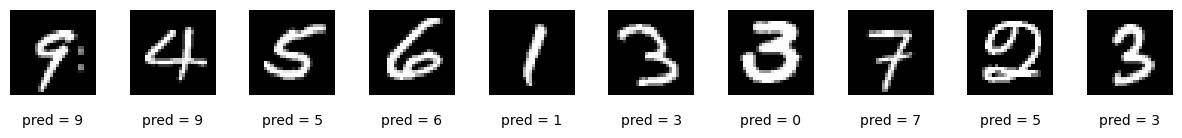

In [524]:
visualize_prediction(ysingle_pred=ysingle_pred)

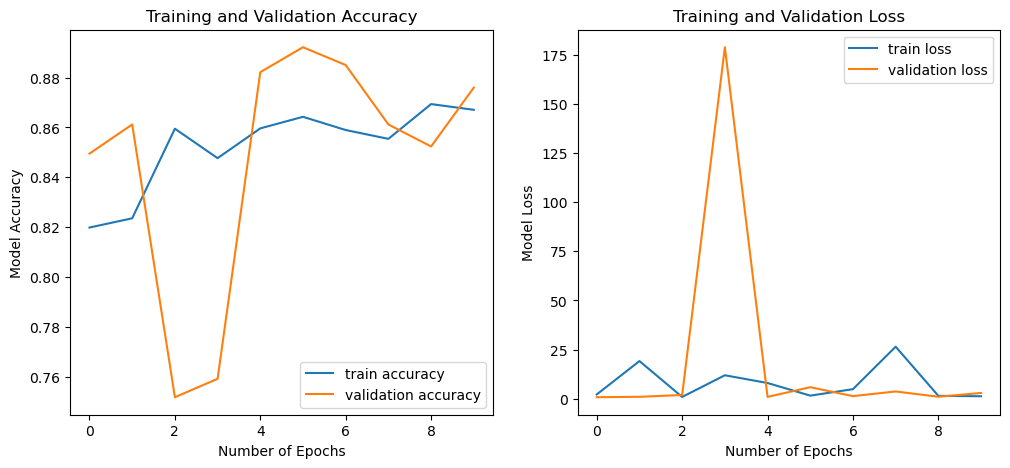

In [550]:
visualize_model_performance(history2)

32/32 [==============================] - 0s 6ms/step


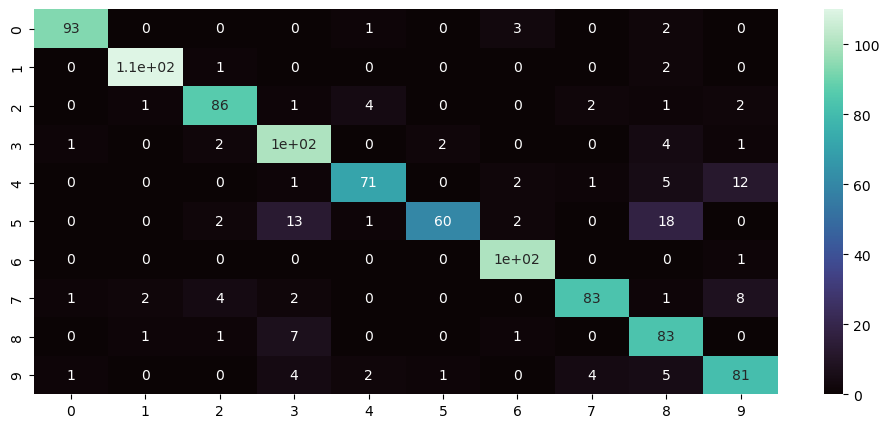

In [526]:
visualize_confusion_matrix(model2)

32/32 [==============================] - 0s 6ms/step


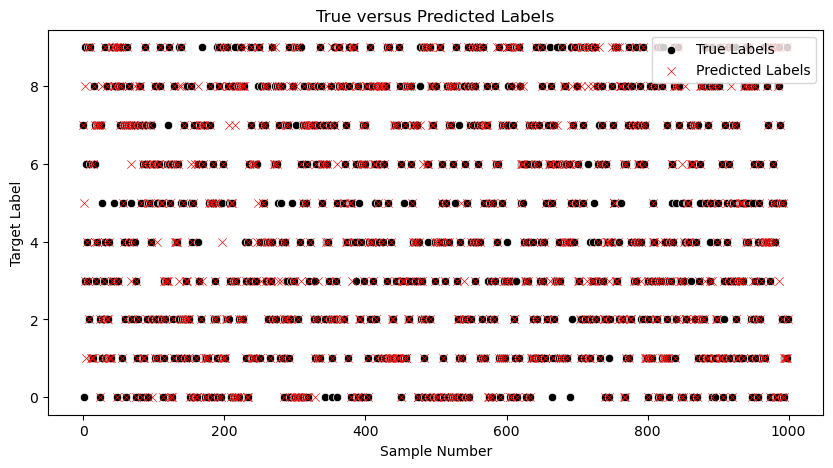

In [527]:
visualize_train_versus_predicted(model2)

<h4>3. Optimizing Model Performance with Batch Normalization and Dropout Layers</h4>

<h5>A. Model Development</h5>

In [528]:
input_layer = Input(shape=(28,28,1))

def mix_layers(x=None, filters=10, kernel_size=(3,3), strides=1, padding="same"):
    conv_layer = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding) (x)
    normalized_layer = BatchNormalization() (conv_layer)
    out_layer = LeakyReLU() (normalized_layer)
    return out_layer

layer1 = mix_layers(x=input_layer, filters=12, kernel_size=(4,4))
layer2 = mix_layers(x=layer1, filters=10, kernel_size=(4,4), strides=2)
layer3 = mix_layers(x=layer2, filters=12, kernel_size=(3,3), strides=1)
layer4 = mix_layers(x=layer3, filters=10, kernel_size=(4,4), strides=2)

flatten = Flatten() (layer4)

dense_layer = Dense(units=200, activation="relu") (flatten)
normalized_layer = BatchNormalization() (dense_layer)
leaky_layer = LeakyReLU() (normalized_layer)
dropout_layer = Dropout(rate=0.5) (leaky_layer)
output_layer = Dense(units=10, activation="softmax") (dropout_layer)

model3 = Model(input_layer, output_layer)
model3.summary()

Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_46 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_54 (Conv2D)          (None, 28, 28, 12)        204       
                                                                 
 batch_normalization_30 (Ba  (None, 28, 28, 12)        48        
 tchNormalization)                                               
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 28, 28, 12)        0         
                                                                 
 conv2d_55 (Conv2D)          (None, 14, 14, 10)        1930      
                                                                 
 batch_normalization_31 (Ba  (None, 14, 14, 10)        40        
 tchNormalization)                                        

The mix_layers() function is used to create combination of convolution layer, and batch normalized layers. We created four such layers and after that, the dropout layer is added to model for regularization to avoid overfitting.

<h5>B. Assigning Loss Function and Optimizer</h5>

In [529]:
opt = Adam(learning_rate=0.006)
model3.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

<h5>C. Model Training</h5>

In [530]:
history3 = model3.fit(X_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_split=0.1) 

Epoch 1/10
1182/1182 [==============================] - 37s 29ms/step - loss: 0.2456 - accuracy: 0.9240 - val_loss: 0.0932 - val_accuracy: 0.9712
Epoch 2/10
1182/1182 [==============================] - 35s 30ms/step - loss: 0.1230 - accuracy: 0.9626 - val_loss: 0.0538 - val_accuracy: 0.9814
Epoch 3/10
1182/1182 [==============================] - 36s 30ms/step - loss: 0.0965 - accuracy: 0.9721 - val_loss: 0.0842 - val_accuracy: 0.9726
Epoch 4/10
1182/1182 [==============================] - 33s 28ms/step - loss: 0.0867 - accuracy: 0.9738 - val_loss: 0.0605 - val_accuracy: 0.9776
Epoch 5/10
1182/1182 [==============================] - 39s 33ms/step - loss: 0.0757 - accuracy: 0.9775 - val_loss: 0.0453 - val_accuracy: 0.9840
Epoch 6/10
1182/1182 [==============================] - 37s 31ms/step - loss: 0.0659 - accuracy: 0.9806 - val_loss: 0.0540 - val_accuracy: 0.9824
Epoch 7/10
1182/1182 [==============================] - 35s 30ms/step - loss: 0.0646 - accuracy: 0.9803 - val_loss: 0.0873 -

After training model3 completely, the training accuracy obtained is 98.5% and validation accuracy is 98.8%. The convergence was quite good and model stability is also good.

<h5>D. Prediction on Testing Dataset</h5>

In [531]:
y_pred = model3.predict(X_test)
ysingle_pred = num_classes[np.argmax(y_pred, axis=-1)]

ysingle_pred

875/875 [==============================] - 9s 10ms/step


array([2, 0, 9, ..., 3, 9, 2])

<h5>E. Visualization of Predicted Outcomes</h5>

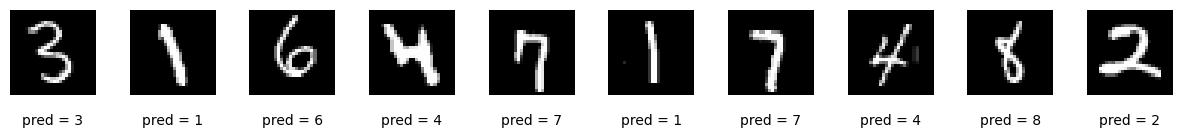

In [532]:
visualize_prediction(ysingle_pred=ysingle_pred)

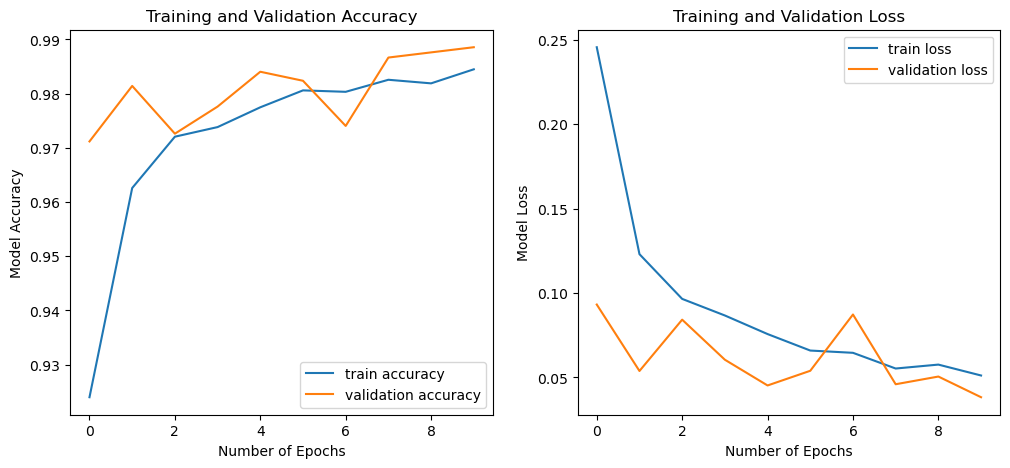

In [533]:
visualize_model_performance(history3)

32/32 [==============================] - 0s 9ms/step


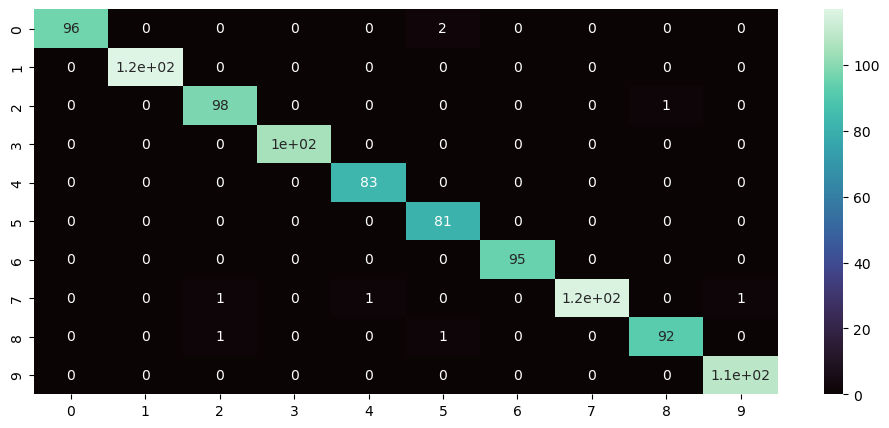

In [534]:
visualize_confusion_matrix(model3)

32/32 [==============================] - 0s 11ms/step


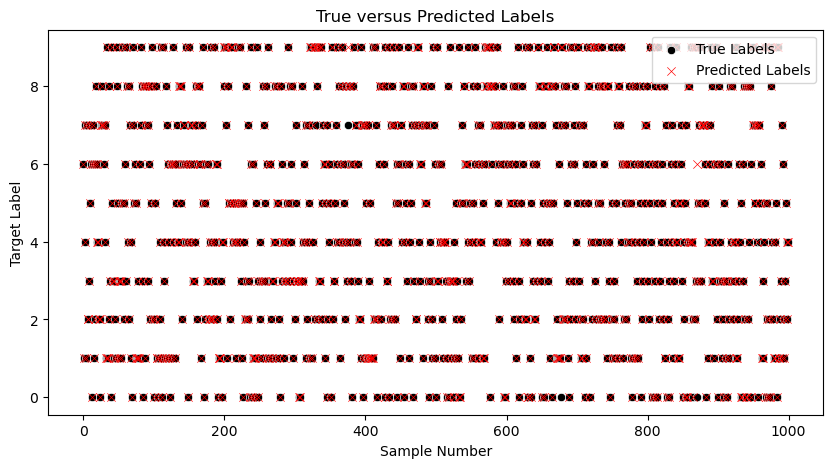

In [535]:
visualize_train_versus_predicted(model3)

<h3>Saving Model using Pickle</h3>

In [536]:
# Save the model to a file
filename = "digit_recognition_model.pkl"
with open(filename, "wb") as file:
    pickle.dump(model3, file)

Saving the model locally using pickle library for using it later in the project.

In [537]:
filename = "digit_recognition_model.pkl"

load_model = None
with open(filename, "rb") as file:
    loaded_model = pickle.load(file)
    loaded_model.summary()

Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_46 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_54 (Conv2D)          (None, 28, 28, 12)        204       
                                                                 
 batch_normalization_30 (Ba  (None, 28, 28, 12)        48        
 tchNormalization)                                               
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 28, 28, 12)        0         
                                                                 
 conv2d_55 (Conv2D)          (None, 14, 14, 10)        1930      
                                                                 
 batch_normalization_31 (Ba  (None, 14, 14, 10)        40        
 tchNormalization)                                        

<h3>Testing Model on Google Image (Custom Image)</h3>

A function to preprocess the raw image to feed into model for further prediction. The input to function if path of the image file.

In [538]:
def predict_digit(img_path):
    image = cv2.imread(img_path)

    plt.figure(figsize=(3,3))
    plt.axis("off")
    plt.imshow(image)
    
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # converting color image to grayscale image.
    
    scaled_image = cv2.resize(gray_image, (28, 28)) # Resizing the image to 28X28
    
#     reverted_image = 255 - scaled_image
    reverted_image = cv2.bitwise_not(scaled_image)
    
    """
    reverting color because we have trained the model on image 
    with black background and white number but we are using
    image with white background and gray or black color for digit.
    """
    
    plt.axis("off")
    plt.imshow(reverted_image, cmap="gray")
    
    y_image = loaded_model.predict(np.array([reverted_image]))
    y_p = num_classes[np.argmax(y_image)]

    plt.figure(figsize=(3, 3))
    ax = plt.subplot()
    ax.axis("off")
    ax.text(0.5, -0.35, f"predicted = {y_p}", fontsize=10, 
            horizontalalignment='center', transform=ax.transAxes)
    ax.imshow(gray_image, cmap="gray")

1/1 [==============================] - 0s 239ms/step


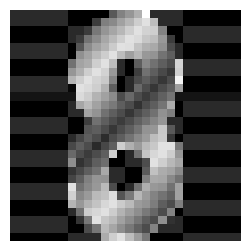

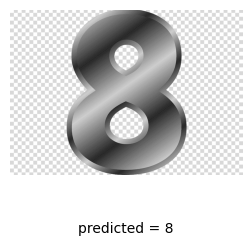

In [539]:
predict_digit("results/n8.png")

The first image is one which is processed for feeding to model while second one is raw image downloaded from Google. The prediction is correct i.e. 8

1/1 [==============================] - 0s 33ms/step


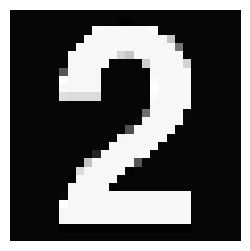

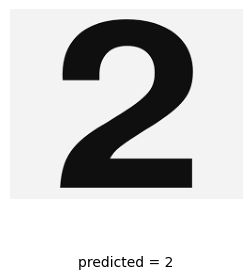

In [540]:
predict_digit("results/n2.png")

1/1 [==============================] - 0s 37ms/step


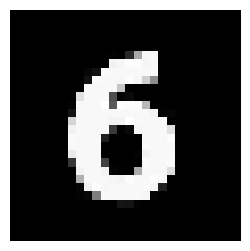

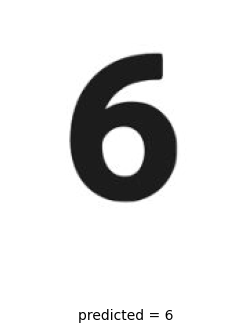

In [541]:
predict_digit("results/n6.jpg")

1/1 [==============================] - 0s 36ms/step


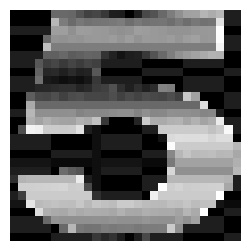

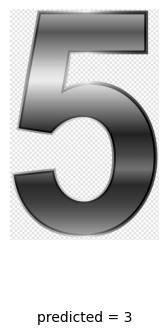

In [542]:
predict_digit("results/n5.png")

<h3>Testing Model on Self Hand Written Digit Image</h3>

1/1 [==============================] - 0s 25ms/step


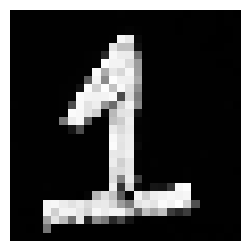

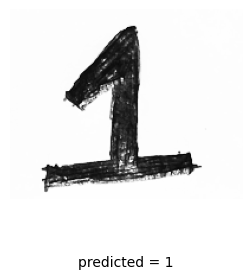

In [543]:
predict_digit("results/n1.png")

Here, the digit is written by ourselves with hand on paper and it's image is taken by mobile phone. Then, image is passed to model for prediction which is also correctly predicted as can be seen above.

<h3>References</h3>

<p>AstroDave, & Will Cukierski. (2012). Digit Recognizer. Kaggle. https://kaggle.com/competitions/digit-recognizer</p>

<p>R. Kanniga Devi; G. Elizabeth Rani. (2019). A Comparative Study on Handwritten Digit Recognizer using Machine Learning Technique. 2019 IEEE International Conference on Clean Energy and Energy Efficient Electronics Circuit for Sustainable Development. Krishnankoil, India: IEEE. https://ieeexplore.ieee.org/abstract/document/9167748</p>

<p>Renata F. P. Neves; Alberto N. G. Lopes Filho; Carlos A.B. Mello; Cleber Zanchettin. (2011). A SVM based off-line handwritten digit recognizer. 2011 IEEE International Conference on Systems, Man, and Cybernetics. Anchorage, AK, USA: IEEE. https://ieeexplore.ieee.org/abstract/document/6083734</p>

<p>Foster, D. (2019). Generative Deep Learning. 1005 Gravenstein Highway North, Sebastopol: O’Reilly Media, Inc.</p>

<p>Keras. (n.d.). Getting started with the Keras functional API. https://keras.io/getting_started/</p>

<p>Matplotlib. (n.d.). Tutorials. https://matplotlib.org/stable/tutorials/index</p>